>**Task 2**

**Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.**

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [24]:
# Load the dataset
df = pd.read_csv('Titanic.csv')

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
df.shape

(891, 12)

**Data Cleaning**

In [30]:
#Handling missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [32]:
df.duplicated().sum()

0

**Data Imputation and Conversion**

In [33]:
#Imputing missing values in Age: 
df['Age'].fillna(df['Age'].median(), inplace=True)

In [34]:
#Converting Age to numeric:
df['Age'] = pd.to_numeric(df['Age'])

In [35]:
#Imputing missing values in Cabin:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)

In [36]:
#Converting Cabin to categorical
df['Cabin'] = df['Cabin'].astype('category')

**Exploratory Data Analysis (EDA)**

#Univariate Analysis
Distribution of Survived: 

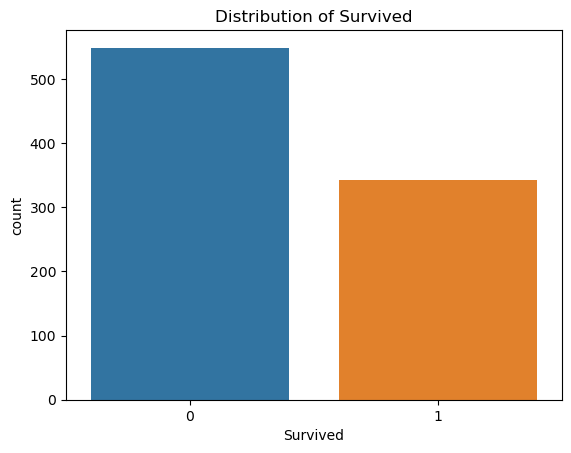

In [37]:
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survived')
plt.show()

#Distribution of Age: 

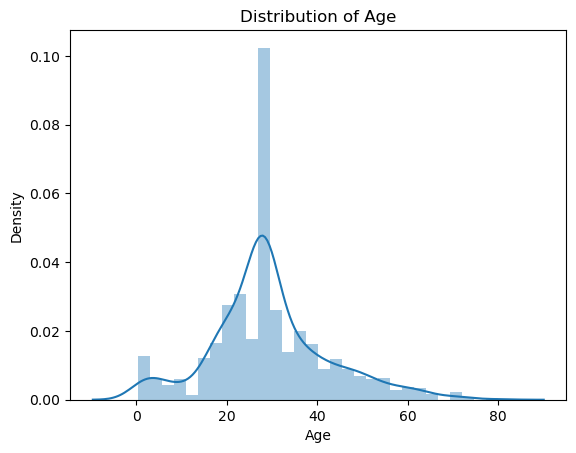

In [38]:
sns.distplot(df['Age'])
plt.title('Distribution of Age')
plt.show()

**Bivariate Analysis**

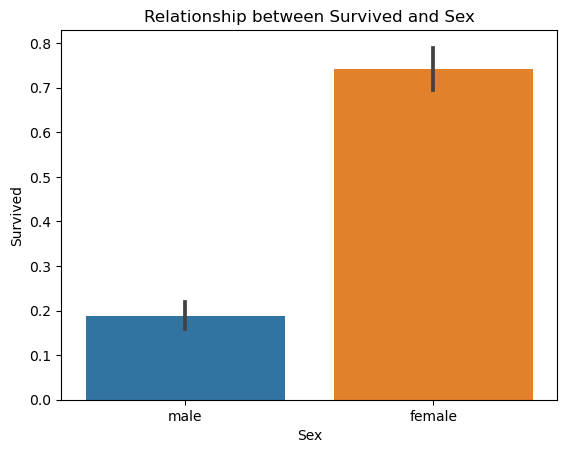

In [39]:
#Relationship between Survived and Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Relationship between Survived and Sex')
plt.show()


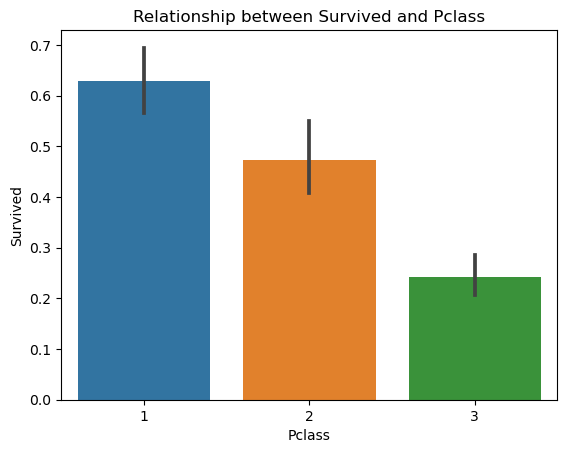

In [40]:
#Relationship between Survived and Pclass:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Relationship between Survived and Pclass')
plt.show()

We see that passengers in higher classes (Pclass 1 and 2) were more likely to survive than those in lower classes (Pclass 3).

**Multivariate Analysis**

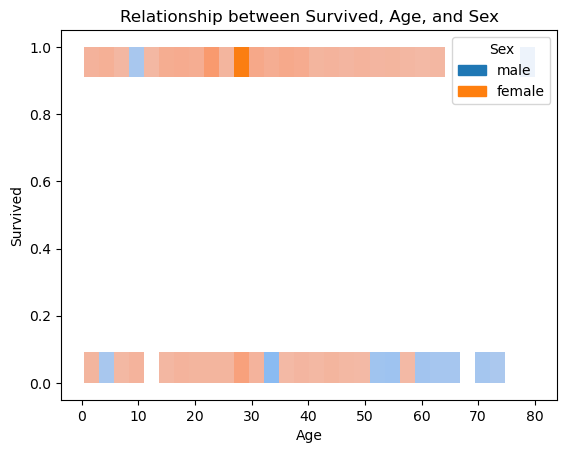

In [41]:
#Relationship between Survived, Age, and Sex
sns.histplot(x='Age', y='Survived', hue='Sex', data=df)
plt.title('Relationship between Survived, Age, and Sex')
plt.show()

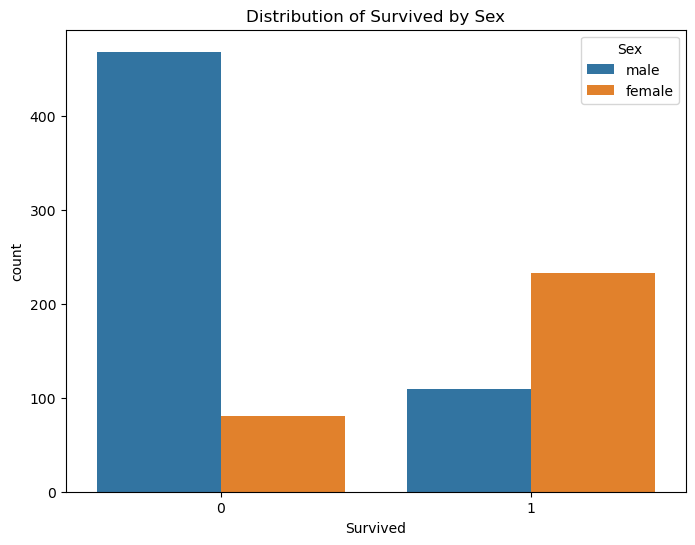

In [42]:
#Relationship between Survived, Age, and Sex
plt.figure(figsize=(8,6))
sns.countplot(x="Survived", hue="Sex", data=df)
plt.title('Distribution of Survived by Sex')
plt.show()

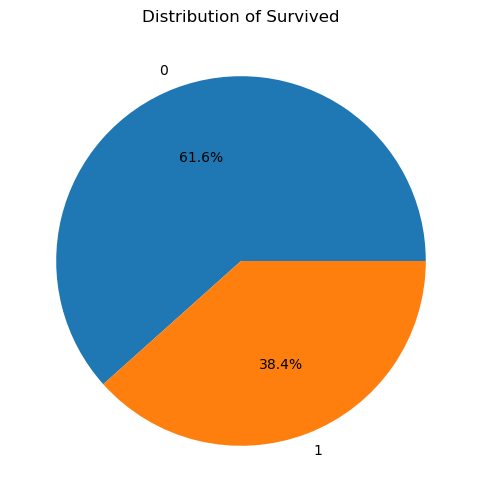

In [49]:
plt.figure(figsize=(8,6))
plt.pie(df['Survived'].value_counts(), labels = df['Survived'].unique(), autopct='%1.1f%%')
plt.title('Distribution of Survived')
plt.show()